In [248]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns
from operator import itemgetter

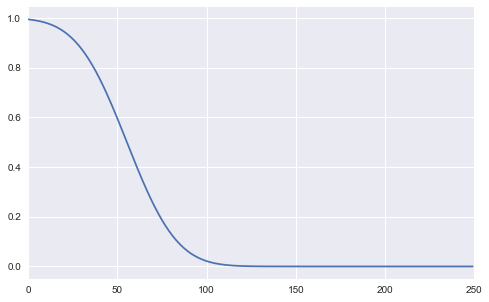

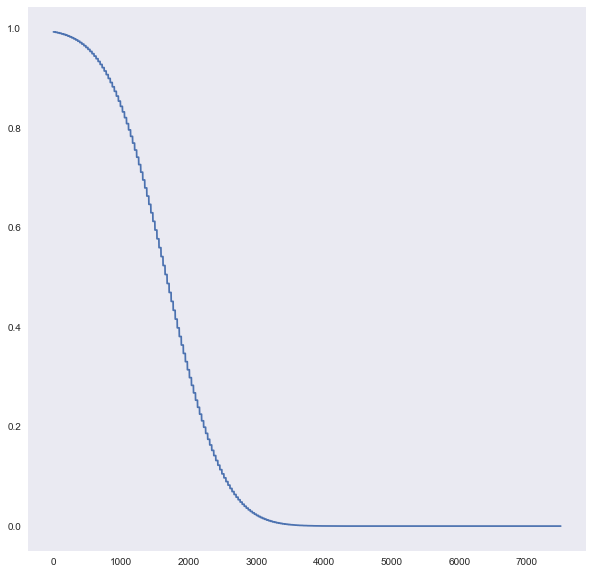

RecursionError: maximum recursion depth exceeded while calling a Python object

In [278]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("dark")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)


def getScheme_data(iters, plot="No", scheme="Sigmoid"):
    
    answer = []

    if scheme == "Sigmoid":
        linspace = np.linspace(0, 9, iters)
        for x in linspace:
            answer.append(0.5 +
                          math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)
    elif scheme == "Exp":
        for x in range(iters):
            answer.append(np.exp(-x / iters))
    elif scheme == "Expvar":
        for x in range(iters):
            answer.append(max(np.exp(-x / iters) - ((3 * x) / iterations) * (1 / math.e), 0))
    elif scheme == "Hillclimb":
        for x in range(iters):
            answer.append(0)
    elif scheme == "Binary":
        for x in range(iters):
            if x < iters/2:
                answer.append(1)
            else:
                answer.append(0)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(ax, iters)
        plt.show()
    return np.array(answer)


def incircle(crds, r=1):
    return np.power(crds[0], 2) + np.power(crds[1], 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r**2 - x**2), np.sqrt(r**2 - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]


# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist


def move(k, coord, temp, rate):
    F = np.array([0.0, 0.0])
    velocity = np.zeros(2, float)
    for l in coord:
        if any(l != k):
            r = np.array(k) - np.array(l)
            F1 = (r / (np.linalg.norm(r)**3) * rate)
            F += F1
    newPoint = k + F
    xr = random.uniform(-1, 1) * rate
    yr = random.uniform(-1, 1) * rate
    newPoint += [xr, yr]
    if not incircle(newPoint, radius):
        newPoint = newPoint / la.norm(newPoint)
    return newPoint, F


def changeCoord(coord, temp, rate):
    coordTemp = []
    score = checkScore(coord)
    fav = []
    for i, k in enumerate(coord):
        cT, favo = move(k, coord, temp, rate)
        coordTemp.append(cT)
        fav.append(favo)
    if score > checkScore(coordTemp):
        return np.array(coordTemp)
    elif temp > random.random():
        return np.array(coordTemp)
    else:
        return changeCoord(coord, temp, rate)


def start_sim(radius, pointsNum, iterations, rate, scheme, markovChain, plotScheme="No"):
    coordList = []
    schemeData = np.repeat(getScheme_data(iterations, plot=plotScheme, scheme=scheme), markovChain)
    iterations = iterations * markovChain

    for i in range(pointsNum):
        coordList.append(spawn(radius))
    coordList = np.array(coordList)

    coordListList = [coordList]
    checklist = []
    for i in range(iterations):
        temp = schemeData[i]
        coordList = changeCoord(coordList, temp, rate)
        coordListList.append(coordList)
        checklist.append(checkScore(coordList))

    return coordList, coordListList, checklist


radius = 1
pointsNum = 16
iterations = 250
rate = math.pow(10, -5)
schemes = ["Sigmoid", "Exp", "Expvar", "Hillclimb"]
scheme = "Sigmoid"
checks = []
coordListListList = []

for scheme in schemes:
    coordList, coordListList, checklist = start_sim(radius, pointsNum,
                                                iterations, rate, scheme, 30 ,plotScheme="Yes")
    checks.append(checklist)
    coordListListList.append(coordListList)
    
    
[plt.plot(check, label=schemes[i]) for i,check in enumerate(checks)]
plt.legend()
plt.show()
[print(check[-1]) for check in checks]

In [268]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

for j in range(len(coordListListList)):
    print(schemes[j])
    def showPlot(i=0):
        plot(coordListListList[j][i])

    # for cll in coordListListList:
    y = interactive(showPlot, i=(0, len(coordListListList[j]) - 1, 1))
    display(y)

Sigmoid


interactive(children=(IntSlider(value=0, description='i', max=250), Output()), _dom_classes=('widget-interact'…

Exp


interactive(children=(IntSlider(value=0, description='i', max=250), Output()), _dom_classes=('widget-interact'…

Expvar


interactive(children=(IntSlider(value=0, description='i', max=250), Output()), _dom_classes=('widget-interact'…

Hillclimb


interactive(children=(IntSlider(value=0, description='i', max=250), Output()), _dom_classes=('widget-interact'…

In [281]:
math.pow(10, -5)

1e-05